# Домашнее задание 1

Это домашнее задание по материалам первого семинаров. Дедлайн по отправке - 23:55 10 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_1

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим следуюущую задачу оптимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

__(а)__ Является ли данная задача всегда выпуклой/сильной выпуклой? При каких условиях?

#### Будем искать $\nabla^2 f(x)$. 
#### Для начала посчитаем $df: f(x) = \frac{1}{2}<x, Ax> - <b, x>. df = \frac{1}{2}(<Ax, dx> + <A^{т}x, dx>)-<b, dx>$.
#### Найдем $d^2 f. Обозначим dx, как dx_1.$ Тогда $ d^2 f = \frac{1}{2}<(A + A^{т})dx_2, dx_1>$.
#### Тогда $\nabla^2 f(x) = \frac{1}{2}(A + A^{т}).$
#### Согласно критерию выпуклости $\nabla^2 f(x) \geq 0 \Rightarrow \frac{1}{2}(A + A^{т}) \geq 0$. Следовательно для выпуклости задачи необходима положительная полуопределенность матрицы А.
#### Согласно критерию сильной выпуклости $\nabla^2 f(x) \geq \mu I \Rightarrow \frac{1}{2}(A + A^{т}) \geq \mu I$. То есть матрица А должна быть положительно полуопределенной и на ее диагонали должны стоять положительные элементы.

__(б)__ Оцените для этой функции константу сильной выпуклости и константу Липшица градиента.

#### Оценим константу Липшица. Из пункта а: $\nabla f(x) = \frac{1}{2}(A + A^{т})x - b$. $||\nabla f(x_0) - \nabla f(x_1)|| = \frac{1}{2}||(A + A^{т})(x_0 - x_1)|| \leq \frac{1}{2}||A + A^{т}||\cdot||x_0 - x_1||$. Тогда из определения Липшицева градиента с константой L получаем $L \geq \frac{1}{2}||A + A^{т}||$.
#### Так же заметим, что $\mu$ - минимальное собственное значение матрицы A, $L$ - максимальное собственное значение матрицы A (утверждение из учебника Гасникова).

## Задача 2

Продолжаем работать с задачей оптимизации из предыдущей задачи.

__(а)__ Придумайте (или найдите) способ генерации матрицы $А$, так чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$.

In [1]:
import math
import numpy as np
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.spatial import distance
import re
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import ortho_group
m = ortho_group.rvs(dim=3)
import sklearn
from sklearn import ensemble, model_selection, metrics, tree
%matplotlib inline
from sklearn.datasets import load_digits
import time

In [2]:
d = 10
mu = 1
L = 100
i = 0
E = np.eye(d)

def positive_determined_matrix(d, mu, L): #генерация положительно-определенной матрицы, так чтобы A-mu*I >= 0
    i = 0
    while i == 0:
        diagonal_entries = np.random.uniform(mu, L,d)
        diagonal_entries[0] = mu
        diagonal_entries[1] = L
        D = np.diag(diagonal_entries)
        m = ortho_group.rvs(d)
        A = m.dot(D).dot(np.linalg.inv(m))
        if (np.all(np.linalg.eigvals(A-mu*E) >= 0)):
            i += 1
        print(np.all(np.linalg.eigvals(A-mu*E) >= 0))
    return A

A = positive_determined_matrix(d, mu, L)
print("Проверка на положительную определенность A:", np.all(np.linalg.eigvals(A) >= 0))
print("Проверка на положительную определенность A - mu*E:", np.all(np.linalg.eigvals(A - mu*E) >= 0))
print("Вектор собственных значений A:\n", np.linalg.eigvals(A))
print("Итоговая матрица А:\n", A)

True
Проверка на положительную определенность A: True
Проверка на положительную определенность A - mu*E: True
Вектор собственных значений A:
 [100.          91.21365451   1.          60.02499022  54.51481335
  47.13890168  35.13580422  28.0175065   24.4089226   22.21937988]
Итоговая матрица А:
 [[ 42.560149    -1.665044     0.99520276   0.66657508  -4.05389202
   -2.4154247  -17.6840049   -3.98113482  -0.3017834   12.92229722]
 [ -1.665044    48.94194316 -10.03105272  -7.48284911  12.48050004
    3.06008245   1.64688241   3.64498429  -7.65674091  -4.73014534]
 [  0.99520276 -10.03105272  66.83774377 -12.11337991   3.33836721
  -16.28412369  -0.50842164  -9.65942571   0.87559054  -6.77465473]
 [  0.66657508  -7.48284911 -12.11337991  37.43549188 -15.9989778
    0.3314944   -7.07751789  -1.99409603   4.15476984  10.09400233]
 [ -4.05389202  12.48050004   3.33836721 -15.9989778   53.29732895
   -7.14352716  12.11917963  -0.83986519  -8.42372156 -17.20410183]
 [ -2.4154247    3.06008245 -1

__(б)__ Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше и произвольным вектором $b$ (лучше ненулевым). Желательно, уже сейчас и метод, и подсчет градиента реализовывать, как отдельные функции, при этом чтобы метод принимал саму целевую функцию (или ее градиент), как параметр. В дальнейшем будет легче менять целевую функцию в задаче минимизации и тестировать разные методы. 

In [3]:
b = np.random.uniform(0, 2, d)
def gradient(x, A, b):
    return A.dot(x) - b


def gradient_descent(A, b, start, learning_rate, amount_of_iterations):
    x = start
    x = x.reshape(1, d)
    for i in range (1, amount_of_iterations):
        x = np.vstack([x, x[i-1] - learning_rate*gradient(x[i-1], A, b)])
    return x
res_x1 = gradient_descent(A, b, np.zeros(d), 0.01, 10000)
res_x2 = gradient_descent(A, b, np.ones(d), 0.01, 10000)
print("Итоговое значение на нулевом начальном векторе:", res_x1[9999])
print("Итоговое значение на единичном начальном векторе:", res_x2[9999])

Итоговое значение на нулевом начальном векторе: [ 0.3140357   0.07665227  0.02704469  0.15325327 -0.11907789 -0.16524382
  0.6901557   0.1449205   0.11731476 -0.07551106]
Итоговое значение на единичном начальном векторе: [ 0.3140357   0.07665227  0.02704469  0.15325327 -0.11907789 -0.16524382
  0.6901557   0.1449205   0.11731476 -0.07551106]


__(в)__ Для задачи с $d = 10$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$, например, с помощью пакетов линейной алгебры (есть встроенный в numpy). Запустите градиентный спуск на $10^4$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x_0$ (если $b$ ненулевой, то можно взять нулевой $x_0$). Проверьте сходится ли он. В качестве критериев сходимости используйте $\| x_k - x^*\|^2$.

In [4]:
x_true = np.linalg.solve(A, b)
print("Истинное значение:", x_true)
print("Значение критерия:", (res_x1[9999] - x_true).dot(res_x1[9999] - x_true))

Истинное значение: [ 0.3140357   0.07665227  0.02704469  0.15325327 -0.11907789 -0.16524382
  0.6901557   0.1449205   0.11731476 -0.07551106]
Значение критерия: 2.325195684864369e-29


__(г)__ Постройте график сходимости: по оси $x$ отложите номер итерации, по $y$ значения критерия на этой итерации. Поиграйтесь с осями, например, поставьте по $y$ логарифмический масштаб. Не забудьте подписать оси. Сделайте вывод о характере сходимости.

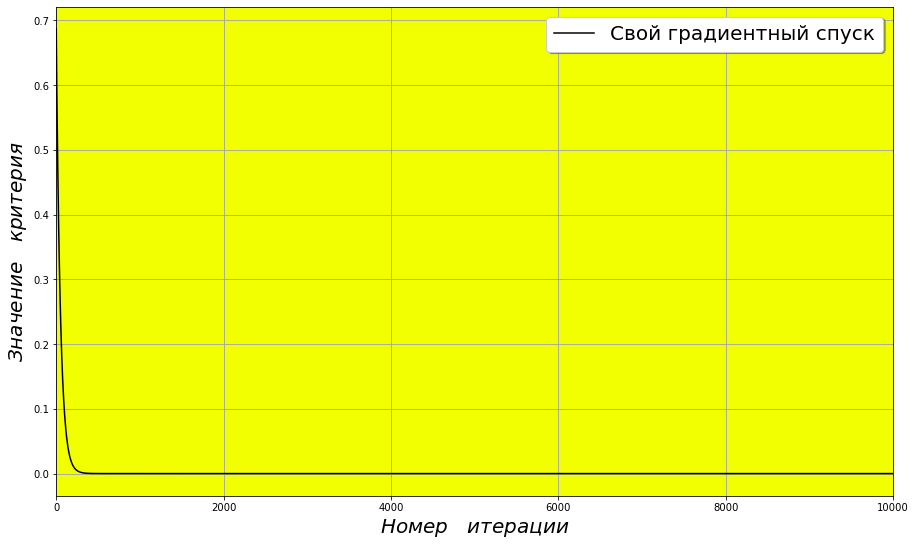

In [5]:
X = np.array([])
for i in range (1, 10001):
    X = np.append(X, i)
Y = np.array([])
for i in range (0, 10000):
    Y = np.append(Y, (res_x1[i] - x_true).dot(res_x1[i] - x_true))
    
fig, ax1 = plt.subplots(figsize = (15, 9))

ax1.grid(color = (0.65, 0.65, 0.65), linewidth = 0.9)
ax1.set_facecolor((0.95, 1, 0))

plt.xlim(0, 10000)

ax1.errorbar(X, Y, fmt = '-',
            color = 'k', ms = 4, label = 'Свой градиентный спуск')

ax1.set_xlabel('$Номер\quad итерации$', fontsize = '20')
ax1.set_ylabel('$Значение\quad критерия$', fontsize = '20')

plt.rc('font', size=16) 

leg = ax1.legend(fontsize = '20', shadow = True)

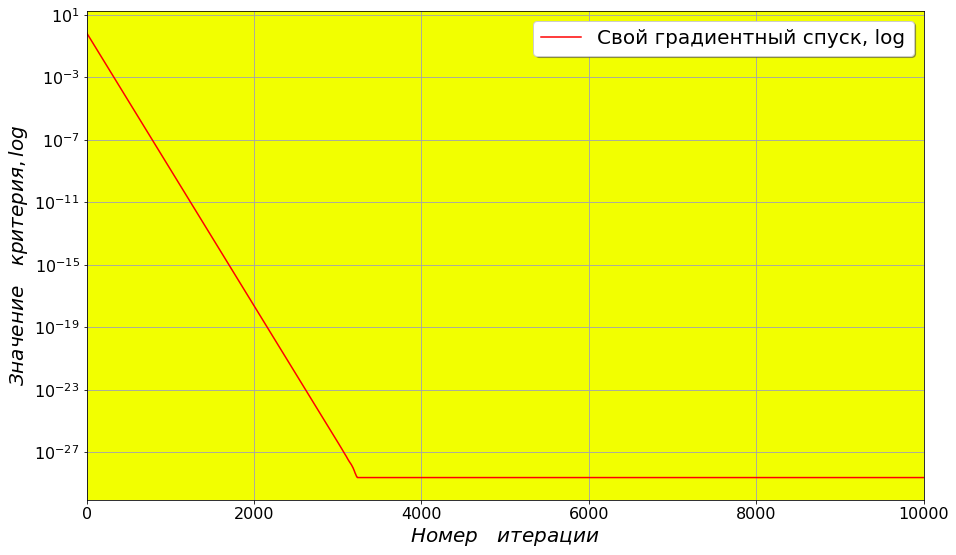

In [6]:
fig, ax1 = plt.subplots(figsize = (15, 9))

ax1.grid(color = (0.65, 0.65, 0.65), linewidth = 0.9)
ax1.set_facecolor((0.95, 1, 0))

plt.xlim(0, 10000)

ax1.errorbar(X, Y, fmt = '-',
            color = 'r', ms = 4, label = 'Свой градиентный спуск, log')

ax1.set_xlabel('$Номер\quad итерации$', fontsize = '20')
ax1.set_ylabel('$Значение\quad критерия, log$', fontsize = '20')
ax1.semilogy()

plt.rc('font', size=16) 

leg = ax1.legend(fontsize = '20', shadow = True)

#### Исходя из вида второго графика с осью y в логарифмическом масштабе делаем вывод о линейной зависимости. Это свопадает с тем, что мы получили на семинаре. Заметим, что график начиная с некоторого шага выходит на прямую. Думаю, что это можно объяснить малостью значения критерия. 

__(д)__ Добавьте на график теоретическую сходимость, полученную на семинаре. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. Сделайте вывод.

In [7]:
eps = (res_x1[9999] - x_true).dot(res_x1[9999] - x_true)
def theor_conv(L, mu, eps):
    return L/mu*np.log(((res_x1[0] - x_true).dot(res_x1[0] - x_true))/eps**2)
print ("Верхняя оценка числа итераций:", theor_conv(L, mu, eps))

Верхняя оценка числа итераций: 13148.687477709072


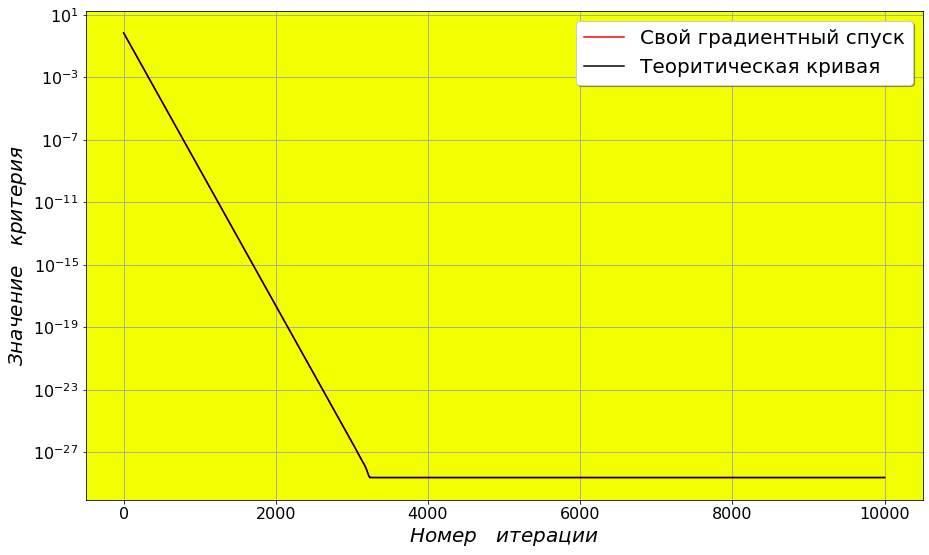

In [8]:
X = np.array([])
for i in range (1, 10001):
    X = np.append(X, i)
Y = np.array([])
for i in range (0, 10000):
    Y = np.append(Y, (res_x1[i] - x_true).dot(res_x1[i] - x_true))
X_theor = np.array([])
for i in range (1, 10001):
    X_theor = np.append(X_theor, i)
Y_theor = np.array([])
for i in range (0, 10000):
    if i == 0:
        Y_theor = np.append(Y_theor, (1 - mu/L)*((res_x1[0] - x_true).dot(res_x1[0] - x_true)))
    else:
        Y_theor = np.append(Y_theor, (1 - mu/L)*((res_x1[i-1] - x_true).dot(res_x1[i-1] - x_true)))

fig, ax1 = plt.subplots(figsize = (15, 9))


ax1.grid(color = (0.65, 0.65, 0.65), linewidth = 0.9)
ax1.set_facecolor((0.95, 1, 0))



ax1.errorbar(X, Y, fmt = '-',
            color = 'r', ms = 4, label = 'Свой градиентный спуск')

ax1.errorbar(X_theor, Y_theor, fmt = '-',
            color = 'k', ms = 4, label = 'Теоритическая кривая')

ax1.set_xlabel('$Номер\quad итерации$', fontsize = '20')
ax1.set_ylabel('$Значение\quad критерия$', fontsize = '20')
ax1.semilogy()

plt.rc('font', size=16) 

leg = ax1.legend(fontsize = '20', shadow = True)

#### Из графиков видно, что для сходимости нашего градиентного спуска необходимо меньшее число итераций, чем в верхней теоритической оценке. Значит наш градиентный спуск удовлетворяет теоритической верхней оценке.

__(e)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Уменьшайте и увеличивайте шаг. Нанесите все новые запуски на график (теоретическую сходимость можно убрать). 

<ipython-input-3-6209fff9b4b1>:10: RuntimeWarning: invalid value encountered in subtract
  x = np.vstack([x, x[i-1] - learning_rate*gradient(x[i-1], A, b)])


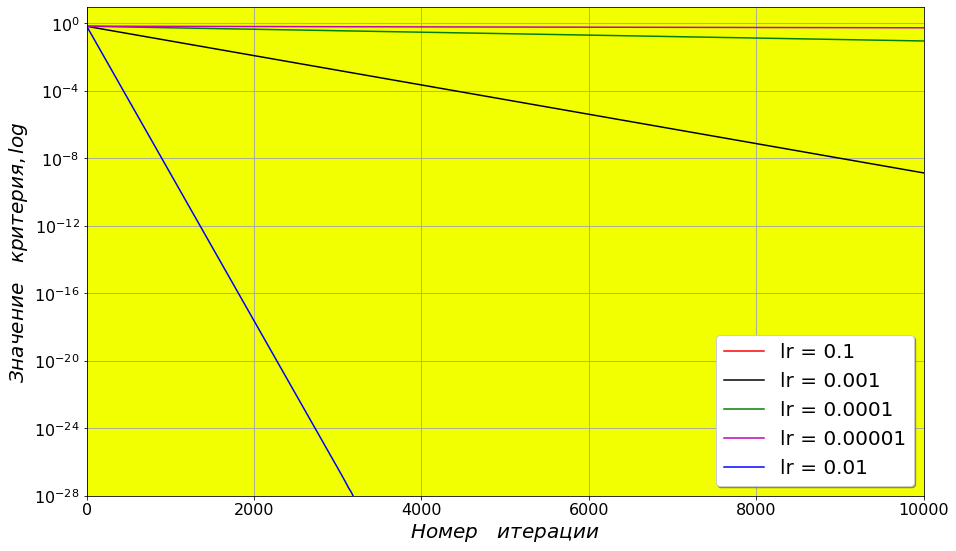

In [9]:
res1 = gradient_descent(A, b, np.zeros(d), 0.1, 10000)
res2 = gradient_descent(A, b, np.zeros(d), 0.001, 10000)
res3 = gradient_descent(A, b, np.zeros(d), 0.0001, 10000)
res4 = gradient_descent(A, b, np.zeros(d), 0.00001, 10000)

X = np.array([])
for i in range (1, 10001):
    X = np.append(X, i)
Y1 = np.array([])
for i in range (0, 10000):
    Y1 = np.append(Y1, (res1[i] - x_true).dot(res1[i] - x_true))
    
Y2 = np.array([])
for i in range (0, 10000):
    Y2 = np.append(Y2, (res2[i] - x_true).dot(res2[i] - x_true))
    
Y3 = np.array([])
for i in range (0, 10000):
    Y3 = np.append(Y3, (res3[i] - x_true).dot(res3[i] - x_true))
    
Y4 = np.array([])
for i in range (0, 10000):
    Y4 = np.append(Y4, (res4[i] - x_true).dot(res4[i] - x_true))
    

fig, ax1 = plt.subplots(figsize = (15, 9))

ax1.grid(color = (0.65, 0.65, 0.65), linewidth = 0.9)
ax1.set_facecolor((0.95, 1, 0))

plt.xlim(0, 10000)
plt.ylim(1e-28, 10)

ax1.errorbar(X, Y1, fmt = '-',
            color = 'r', ms = 4, label = 'lr = 0.1')
ax1.errorbar(X, Y2, fmt = '-',
            color = 'k', ms = 4, label = 'lr = 0.001')
ax1.errorbar(X, Y3, fmt = '-',
            color = 'g', ms = 4, label = 'lr = 0.0001')
ax1.errorbar(X, Y4, fmt = '-',
            color = 'm', ms = 4, label = 'lr = 0.00001')
ax1.errorbar(X, Y, fmt = '-',
            color = 'b', ms = 4, label = 'lr = 0.01')

ax1.set_xlabel('$Номер\quad итерации$', fontsize = '20')
ax1.set_ylabel('$Значение\quad критерия, log$', fontsize = '20')
ax1.semilogy()

plt.rc('font', size=16) 

leg = ax1.legend(fontsize = '20', shadow = True)

#### Видим, что при малом шаге метод не сходится на числе итераций $10^4$. При увеличении шага метод начинается сходиться при все меньшем числе итераций. Но при шаге $lr = 0.1$ метод перестает сходиться. 

__(ж)__ Для задачи с $\mu = 0$ и $L = 1000$, проделайте те же действия, что и в пунктах (в), (г) с числом итераций равным $10^5$. Сделайте вывод.

In [10]:
A1 = positive_determined_matrix(d, 1e-8, 1000)

res01 = gradient_descent(A1, b, np.zeros(d), 1e-7, 10000)
x_true1 = np.linalg.solve(A1, b)
print("Значение критерия:", (res01[9999] - x_true1).dot(res01[9999] - x_true1))

False
True
Значение критерия: 136669685240049.12


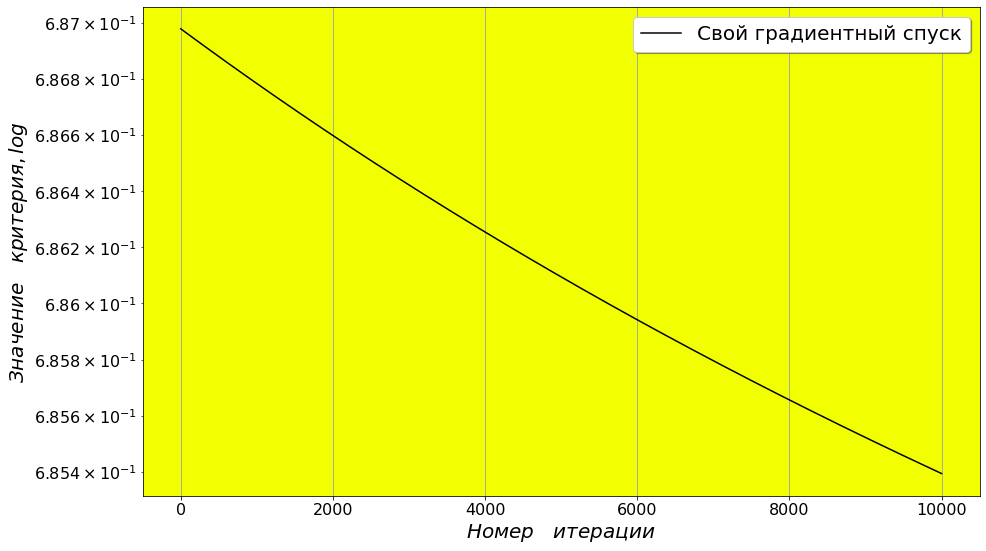

In [11]:
X01 = np.array([])
for i in range (1, 10001):
    X01 = np.append(X01, i)
Y01 = np.array([])
for i in range (0, 10000):
    Y01 = np.append(Y01, (res01[i] - x_true).dot(res01[i] - x_true))
    
fig, ax1 = plt.subplots(figsize = (15, 9))

ax1.grid(color = (0.65, 0.65, 0.65), linewidth = 0.9)
ax1.set_facecolor((0.95, 1, 0))


ax1.errorbar(X01, Y01, fmt = '-',
            color = 'k', ms = 4, label = 'Свой градиентный спуск')

ax1.set_xlabel('$Номер\quad итерации$', fontsize = '20')
ax1.set_ylabel('$Значение\quad критерия, log$', fontsize = '20')

ax1.semilogy()

plt.rc('font', size=16) 

leg = ax1.legend(fontsize = '20', shadow = True)

#### Так как $mu = 0$, то исходя из полученной оценки на семинаре количество итераций не ограничено. Из полученного графика видно, что градиентный спуск не сходится на достаточно большом количестве шагов. 

__(з)__ Все ли получилось в предыдущем пункте? Если нет, то поясните почему (если это еще не сделано в выводах прошлого пункта). Проделайте пункты (в)-(e), но с критерием сходимости $f(x_k) - f(x^*)$ и/или $f(\bar x_k) - f(x^*)$ (здесь $\bar x_k$ - средняя точка на текущей и предыдущих итерациях). Сделайте вывод.

In [12]:
def func(A, b, x):
    return 1/2*((x.T).dot(A).dot(x)) - b.dot(x)
print("Значение критерия:", (func(A1, b, res01[9999]) - func(A1, b, x_true1)))

Значение критерия: 683349.3936070285


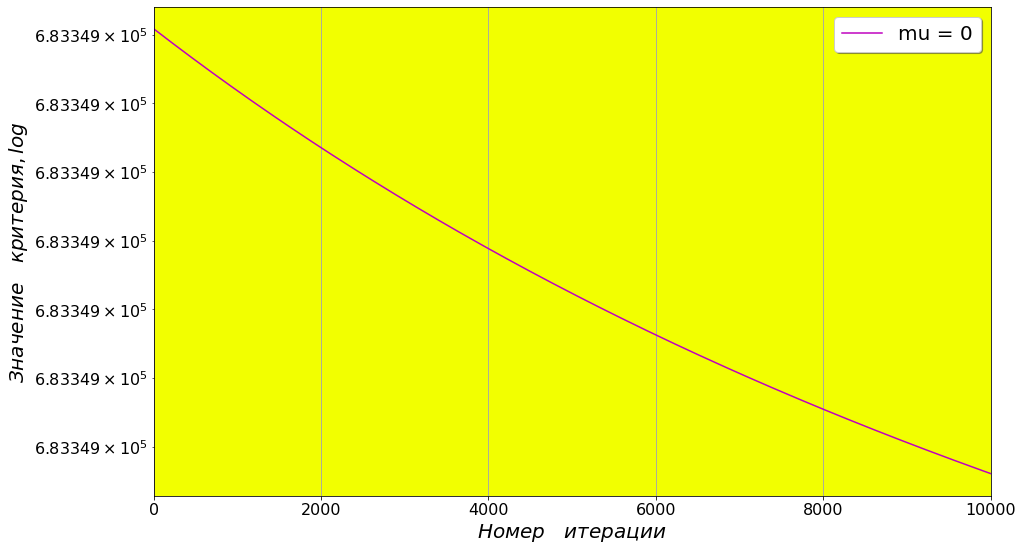

In [13]:
X01 = np.array([])
for i in range (1, 10001):
    X01 = np.append(X01, i)
    
Y006 = np.array([])
for i in range (0, 10000):
    Y006 = np.append(Y006, (func(A1, b, res01[i]) - func(A1, b, x_true1)))
    
fig, ax1 = plt.subplots(figsize = (15, 9))

ax1.grid(color = (0.65, 0.65, 0.65), linewidth = 0.9)
ax1.set_facecolor((0.95, 1, 0))


ax1.errorbar(X01, Y006, fmt = '-',
            color = 'm', ms = 4, label = 'mu = 0')

plt.xlim(0, 10000)


ax1.set_xlabel('$Номер\quad итерации$', fontsize = '20')
ax1.set_ylabel('$Значение\quad критерия, log$', fontsize = '20')

ax1.semilogy()

plt.rc('font', size=16) 

leg = ax1.legend(fontsize = '20', shadow = True)

#### Был построен график со значением критерия $f(x) - f(x^*)$. Из графика видно, что градиентный спуск не сходится, так же, как и с критерием $||x_k - x^*||^2$. Результаты и выводы соответственно совпадают с предыдущим пунктом.

__Бонусные пункт__

Исследуйте другие техники подбора шага, озвученные на семинаре: 

1) Уменьшающийся с номером итерации шаг,

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$,

3) Правила Армихо, Вульфа и Гольдстейна: смотри параграф 3.1 из https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf,

4) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$.

Эксперименты нужно провести, как для сильно выпуклых, так и выпуклых задач. Сравните не только число итераций, но и время работы методов. Учтите, что правила Армихо, Вульфа, Гольстейна и Поляка-Шора требуют подбора дополнительных параметров эврестически (поиграйте с этими параметрами отдельно и выберете какой подходит лучше).

#### 0. Перезапустим все важные функции

In [14]:
A = positive_determined_matrix(10, 1, 100)
A1 = positive_determined_matrix(10, 1e-8, 1000)
b = np.random.uniform(0, 2, d)

False
True
False
False
False
True


In [15]:
def func(A, b, x):
    return 1/2*((x.T).dot(A).dot(x)) - b.dot(x)
def gradient(x, A, b):
    return A.dot(x) - b

In [65]:
def gradient_descent(A, b, start, learning_rate, amount_of_iterations):    
    x = start
    x = x.reshape(1, d)
    begin_time = time.time()
    timeprog = []
    grad_array = []
    for i in range (1, amount_of_iterations):
        if learning_rate == 1:
            lr = 50/(L*i)
        if learning_rate == 2:
            lr = fastest_descent(x[i-1], A, b)
        if learning_rate == 4:
            lr = Polyak(x[i-1], A, b)
        grad = gradient(x[i-1], A, b)
        x = np.vstack([x, x[i-1] - lr*grad])
        timeprog.append(time.time() - begin_time)
        grad_array.append(grad)
    return x, grad_array, timeprog

#### Далее, везде критерий - $||\nabla f(x)||^2$

#### 1. Уменьшающийся с номером итерации шаг

In [66]:
res1, grad1, time1 = gradient_descent(A, b, np.zeros(d), 1, 10000)
res01, grad01, time01 = gradient_descent(A1, b, np.zeros(d), 1, 10000)

In [67]:
x_true = np.linalg.solve(A, b)
x_true1 = np.linalg.solve(A1, b)
print("Значение критерия разности функций для сильно выпуклой:", abs(func(A, b, res1[9999]) - func(A, b, x_true)))
print("Значение критерия близость нормы градиента к нулю для сильно выпуклой:", grad1[9998].dot(grad1[9998]))
print("Значение критерия разности функций для выпуклой:", abs(func(A1, b, res01[9999]) - func(A1, b, x_true1)))
print("Значение критерия близость нормы градиента к нулю для выпуклой:", grad01[9998].dot(grad01[9998]))

Значение критерия разности функций для сильно выпуклой: 9.666982695999415e-07
Значение критерия близость нормы градиента к нулю для сильно выпуклой: 1.9335899123893436e-06
Значение критерия разности функций для выпуклой: 4.983301355287022e+251
Значение критерия близость нормы градиента к нулю для выпуклой: 9.96663465349417e+243


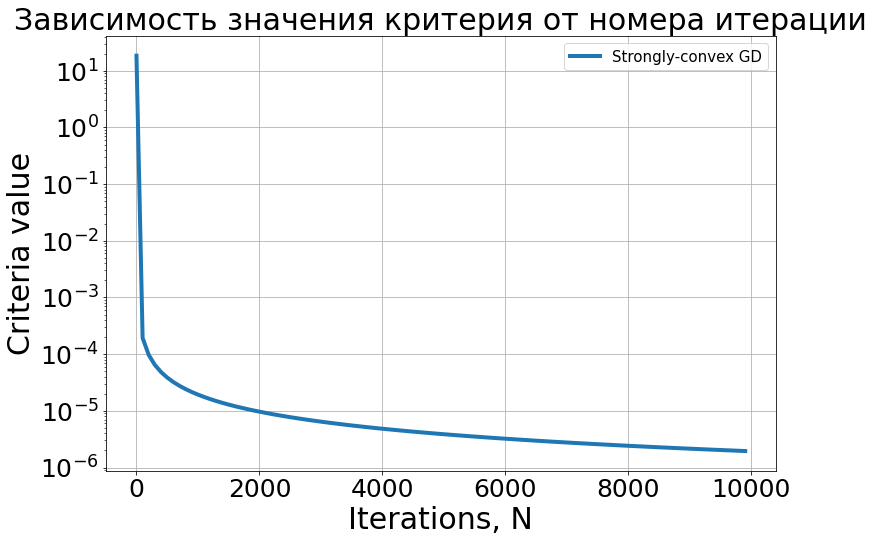

In [68]:
X = np.array([])
for i in range (0, 100):
    X = np.append(X, 100*i)
Y = np.array([])
for i in range (0, 100):
    Y = np.append(Y, grad1[100*i].dot(grad1[100*i]))
X1 = np.array([])
for i in range (0, 100):
    X1 = np.append(X1, 100*i)
Y1 = np.array([])
for i in range (0, 100):
    Y1 = np.append(Y1, grad01[100*i].dot(grad01[100*i]))
    
plt.figure(figsize=(12, 8))

plt.semilogy(X, Y, linewidth=4, label = 'Strongly-convex GD')
#plt.semilogy(X1, Y1, linewidth=4, label = 'Convex GD', markevery = (0, 1000),  marker="^", markersize = 20)

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"Iterations, N", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от номера итерации", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.grid()

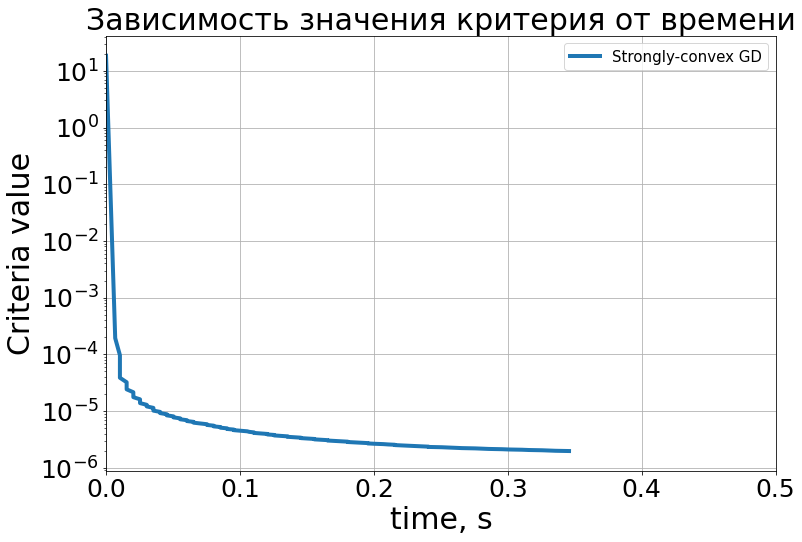

In [69]:
X = np.array([])
for i in range (0, 99):
    X = np.append(X, time1[100*i])
Y = np.array([])
for i in range (0, 99):
    Y = np.append(Y, grad1[100*i].dot(grad1[100*i]))
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, time01[100*i])
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, grad01[100*i].dot(grad01[100*i]))
    
plt.figure(figsize=(12, 8))
    
plt.semilogy(X, Y, linewidth=4, label = 'Strongly-convex GD')
#plt.semilogy(X1, Y1, linewidth=4, label = 'Convex GD', markevery = (0, 10),  marker="^", markersize = 20)

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 0.5)

plt.grid()

#### 2. Наискорейший спуск

Получим формулу.

$f(x_{k + 1}) → min$

$\gamma_k = argmin_{\gamma \geq 0}f(x_{k + 1}(\gamma))$

Возьмём производную и приравняем её к нулю, получим $\nabla f_{k + 1}^T \nabla f_k = 0$.

Но $\nabla f_{k + 1} = (Ax_{k + 1} - b)$, тогда:

$g = \nabla f(x_k), (Ax_{k + 1} - b)^T g = 0, (x_k -\gamma g)Ag -b^Tg = 0, x_k^TAg -\gamma g^TAg -b^Tg = 0$

$g^Tg - \gamma g^TAg = 0 \Rightarrow$
$\gamma = \frac{g^Tg}{g^TAg}$ 

In [70]:
def fastest_descent(x, A, b):
    return (gradient(x, A, b).dot(gradient(x, A, b)))/((gradient(x, A, b)).T.dot(A).dot(gradient(x, A, b)))
res2, grad2, time2 = gradient_descent(A, b, np.zeros(d), 2, 10000)
res02, grad02, time02 = gradient_descent(A1, b, np.zeros(d), 2, 10000)

In [71]:
print("Значение критерия разности функций для сильно выпуклой:", abs(func(A, b, res2[9999]) - func(A, b, x_true)))
print("Значение критерия близость нормы градиента к нулю для сильно выпуклой:", grad2[9998].dot(grad2[9998]))
print("Значение критерия разности функций для выпуклой:", abs(func(A1, b, res02[9999]) - func(A1, b, x_true1)))
print("Значение критерия близость нормы градиента к нулю для выпуклой:", grad02[9998].dot(grad02[9998]))

Значение критерия разности функций для сильно выпуклой: 0.0
Значение критерия близость нормы градиента к нулю для сильно выпуклой: 3.944304526105059e-31
Значение критерия разности функций для выпуклой: 168255020.5567051
Значение критерия близость нормы градиента к нулю для выпуклой: 7.500080094211924


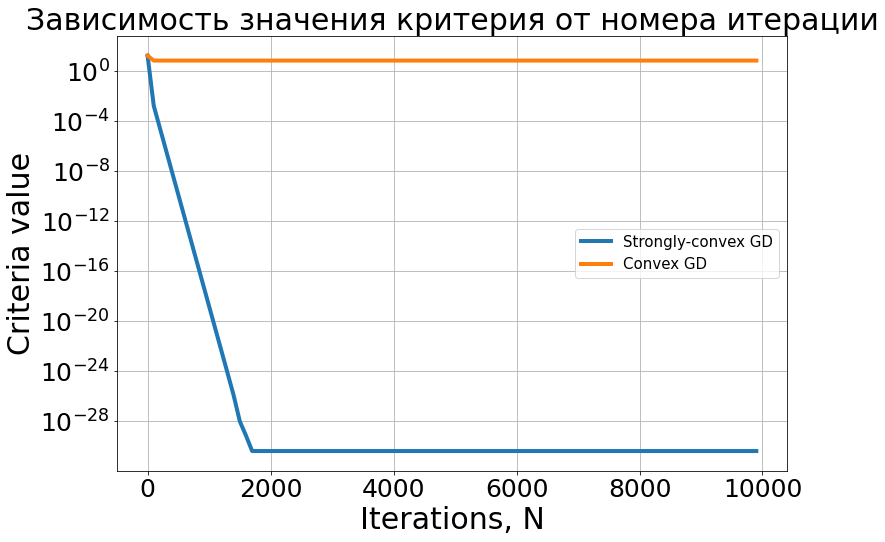

In [72]:
X = np.array([])
for i in range (0, 100):
    X = np.append(X, 100*i)
Y = np.array([])
for i in range (0, 100):
    Y = np.append(Y, grad2[100*i].dot(grad2[100*i]))
X1 = np.array([])
for i in range (0, 100):
    X1 = np.append(X1, 100*i)
Y1 = np.array([])
for i in range (0, 100):
    Y1 = np.append(Y1, grad02[100*i].dot(grad02[100*i]))
    
plt.figure(figsize=(12, 8))
    
plt.semilogy(X, Y, linewidth=4, label = 'Strongly-convex GD')
plt.semilogy(X1, Y1, linewidth=4, label = 'Convex GD')

plt.legend(loc="best", fontsize=15)
plt.xlabel(r"Iterations, N", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от номера итерации", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.grid()

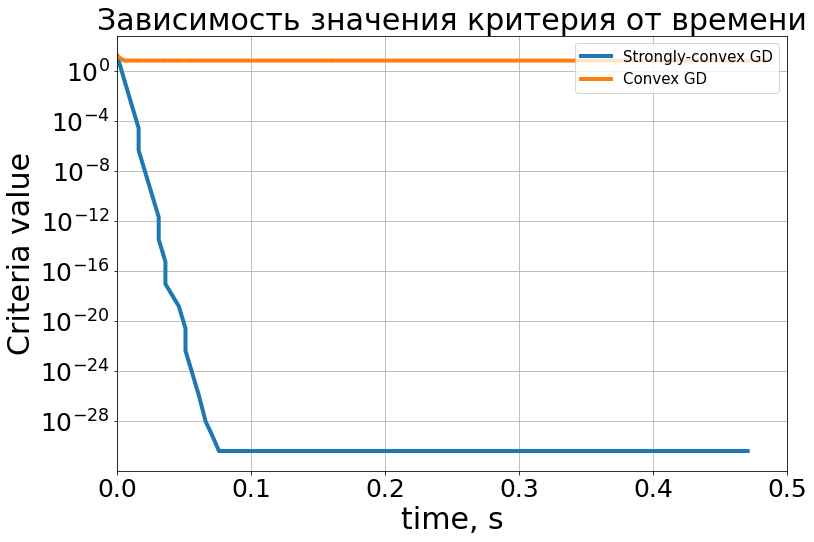

In [73]:
X = np.array([])
for i in range (0, 99):
    X = np.append(X, time2[100*i])
Y = np.array([])
for i in range (0, 99):
    Y = np.append(Y, grad2[100*i].dot(grad2[100*i]))
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, time02[100*i])
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, grad02[100*i].dot(grad02[100*i]))
    
plt.figure(figsize=(12, 8))
    
plt.semilogy(X, Y, linewidth=4, label = 'Strongly-convex GD')
plt.semilogy(X1, Y1, linewidth=4, label = 'Convex GD')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 0.5)

plt.grid()

#### 3. Правило Армихо, Фульфа, Голдштейна

#### a) Правило Армихо
Заданы числа $\gamma_0 > 0; \theta, \varepsilon \in (0,1)$. Величина $\gamma $ выбирается следующим образом: изначально $\gamma = \gamma_0$, на каждом шаге если
$f(x_{k + 1}) < f(x_k) - \varepsilon\gamma  \nabla f_k^T\nabla f$ то переходим к следующему шагу, иначе полагаем $\gamma := \theta \gamma$ и снова проверяем условие.

Оптимальные значения: $\gamma_0 = 1, \varepsilon = 0.8, \theta = 0.99$

In [74]:
def gradient_descent_Armijo(A, b, start, lr, amount_of_iterations):    
    x = start
    x = x.reshape(1, d)
    begin_time = time.time()
    timeprog = []
    grad_array = []
    theta = 0.99
    eps = 0.8
    for i in range (1, amount_of_iterations):
        grad = gradient(x[i-1], A, b)
        grad_array.append(grad)
        while (func(A, b, x[i-1] - lr*grad) >= func(A, b, x[i-1]) - eps*lr*grad.T.dot(grad)):
            lr = lr*theta
        x = np.vstack([x, x[i-1] - lr*grad])
        timeprog.append(time.time() - begin_time)
    return x, grad_array, timeprog

In [75]:
res3a, grad3a, time3a = gradient_descent_Armijo(A, b, np.zeros(d), 1, 1000)
res03a, grad03a, time03a = gradient_descent_Armijo(A1, b, np.zeros(d), 1, 1000)

In [76]:
print("Значение критерия разности функций для сильно выпуклой:", abs(func(A, b, res3a[999]) - func(A, b, x_true)))
print("Значение критерия близость нормы градиента к нулю для сильно выпуклой:", grad3a[998].dot(grad3a[998]))
print("Значение критерия разности функций для выпуклой:", abs(func(A1, b, res03a[999]) - func(A1, b, x_true1)))
print("Значение критерия близость нормы градиента к нулю для выпуклой:", grad03a[998].dot(grad03a[998]))

Значение критерия разности функций для сильно выпуклой: 2.608243010460143e-09
Значение критерия близость нормы градиента к нулю для сильно выпуклой: 5.302185091121165e-09
Значение критерия разности функций для выпуклой: 168255086.2667516
Значение критерия близость нормы градиента к нулю для выпуклой: 3.3650983944558783


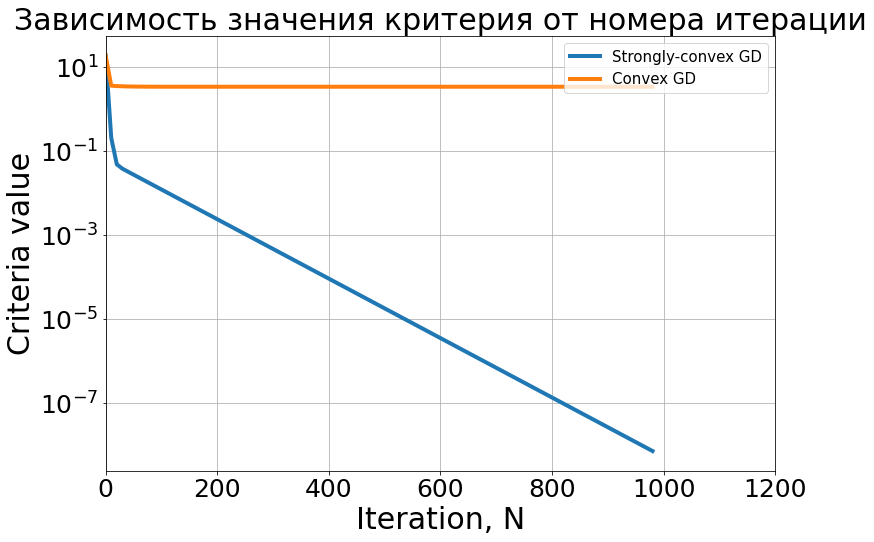

In [77]:
X = np.array([])
for i in range (0, 99):
    X = np.append(X, 10*i)
Y = np.array([])
for i in range (0, 99):
    Y = np.append(Y, grad3a[10*i].dot(grad3a[10*i]))
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, 10*i)
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, grad03a[10*i].dot(grad03a[10*i]))
    
plt.figure(figsize=(12, 8))
    
plt.semilogy(X, Y, linewidth=4, label = 'Strongly-convex GD')
plt.semilogy(X1, Y1, linewidth=4, label = 'Convex GD', markersize = 20)

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"Iteration, N", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от номера итерации", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 1200)

plt.grid()

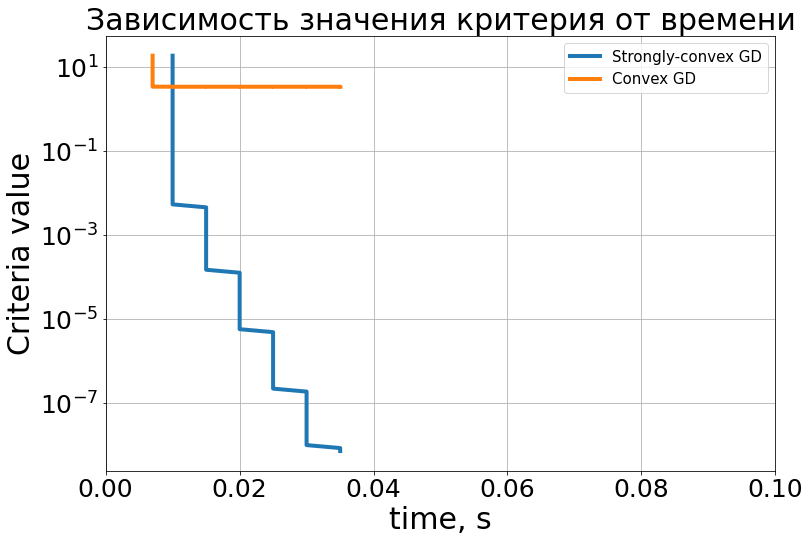

In [78]:
X = np.array([])
for i in range (0, 99):
    X = np.append(X, time3a[10*i])
Y = np.array([])
for i in range (0, 99):
    Y = np.append(Y, grad3a[10*i].dot(grad3a[10*i]))
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, time03a[10*i])
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, grad03a[10*i].dot(grad03a[10*i]))
    
plt.figure(figsize=(12, 8))
    
plt.semilogy(X, Y, linewidth=4, label = 'Strongly-convex GD')
plt.semilogy(X1, Y1, linewidth=4, label = 'Convex GD', markersize = 20)

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 0.1)

plt.grid()

#### б) Условие Вульфа: 

Допустим мы хотим, чтобы функция мало того чтобы убывала достаточно, но и чтобы градиент был не слишком маленьким. Тогда запишем условие Вульфа: 
\begin{equation}
f(x_{k + 1}) \leq f(x_k) - c_1\alpha \nabla f^T(x_k)\nabla f(x_k) \\
\nabla f(x_{k + 1})^T \nabla f(x_k) \geq  c_2 \nabla f^T (x_k)\nabla f(x_k)
\end{equation}
Константы выбираются следующим образом: $0 < c_1 < c_2 < 1$. Возьмем $c_1 = 0.01$, что означает, что функция после совершения шага должна уменьшиться, a $c_2 = 0.9$, что, в свою очередь, означает, что проекция градиента в новом приближении должна либо изменить направление, либо уменьшиться.

In [79]:
def koef1(A, b, x, grad):
    c1 = 0.01
    return (2*c1*grad.T.dot(grad) - (x.T.dot(A).dot(grad) + grad.T.dot(A).dot(x)) + 2*b.T.dot(grad))/(grad.T.dot(A).dot(grad))
def koef2(A, grad):
    c2 = 0.9
    return (2*(1-c2)*grad.T.dot(grad))/(grad.T.dot(A).dot(grad) + grad.T.dot(A.T).dot(grad))

def gradient_descent_Wolfe(A, b, start, amount_of_iterations):    
    x = start
    x = x.reshape(1, d)
    begin_time = time.time()
    timeprog = []
    grad_array = []
    for i in range(1, amount_of_iterations):
        grad = gradient(x[i-1], A, b)
        grad_array.append(grad)
        k1 = koef1(A, b, x[i-1], grad)
        k2 = koef2(A, grad)
        lr = np.random.uniform(max(k1, 0), k2, 1)
        x = np.vstack([x, x[i-1] - lr*grad])
        timeprog.append(time.time() - begin_time)
    return x, grad_array, timeprog

In [80]:
res3w, grad3w, time3w = gradient_descent_Wolfe(A, b, np.zeros(d), 1000)
res03w, grad03w, time03w = gradient_descent_Wolfe(A1, b, np.zeros(d), 1000)

In [81]:
print("Значение критерия разности функций для сильно выпуклой:", abs(func(A, b, res3w[999]) - func(A, b, x_true)))
print("Значение критерия близость нормы градиента к нулю для сильно выпуклой:", grad3w[998].dot(grad3w[998]))
print("Значение критерия разности функций для выпуклой:", abs(func(A1, b, res03w[999]) - func(A1, b, x_true1)))
print("Значение критерия близость нормы градиента к нулю для выпуклой:", grad03w[998].dot(grad03w[998]))

Значение критерия разности функций для сильно выпуклой: 5.551115123125783e-17
Значение критерия близость нормы градиента к нулю для сильно выпуклой: 4.788816240182469e-25
Значение критерия разности функций для выпуклой: 168190238.6535822
Значение критерия близость нормы градиента к нулю для выпуклой: 6.320127282413237


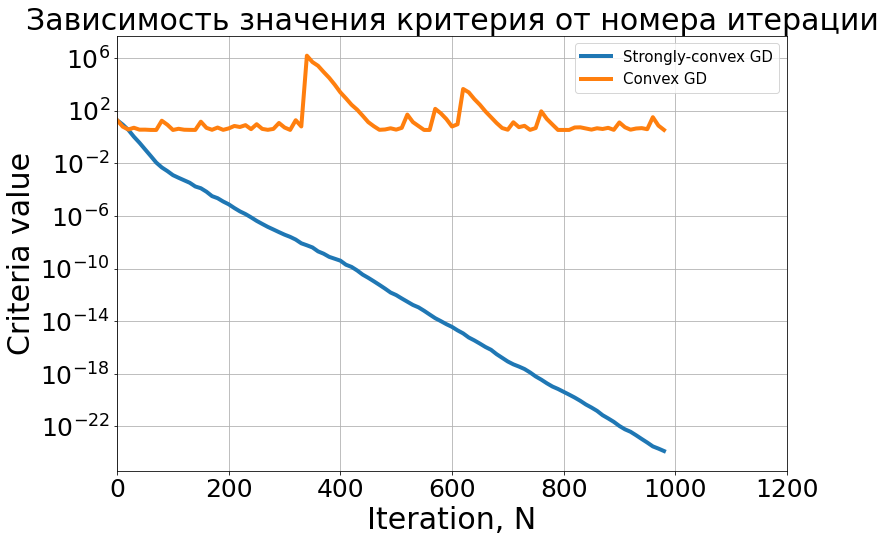

In [82]:
X = np.array([])
for i in range (0, 99):
    X = np.append(X, 10*i)
Y = np.array([])
for i in range (0, 99):
    Y = np.append(Y, grad3w[10*i].dot(grad3w[10*i]))
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, 10*i)
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, grad03w[10*i].dot(grad03w[10*i]))
    
plt.figure(figsize=(12, 8))
    
plt.semilogy(X, Y, linewidth=4, label = 'Strongly-convex GD')
plt.semilogy(X1, Y1, linewidth=4, label = 'Convex GD', markersize = 20)

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"Iteration, N", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от номера итерации", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 1200)

plt.grid()

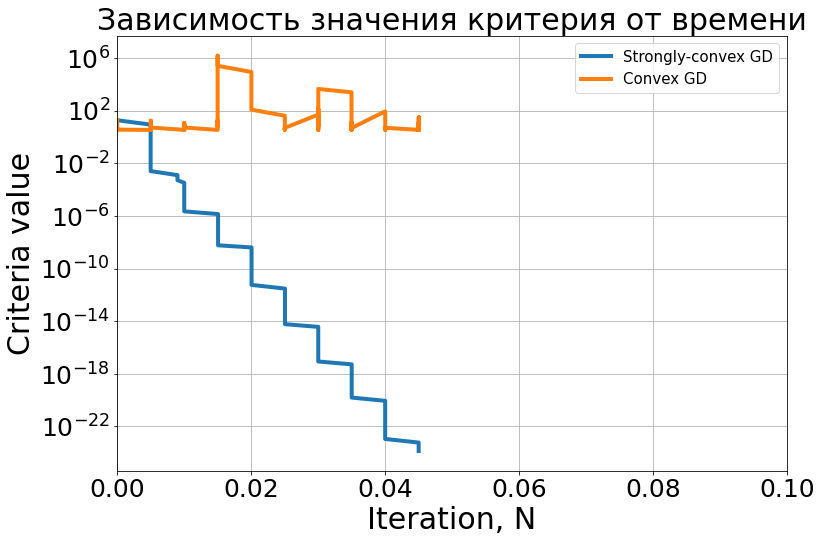

In [83]:
X = np.array([])
for i in range (0, 99):
    X = np.append(X, time3w[10*i])
Y = np.array([])
for i in range (0, 99):
    Y = np.append(Y, grad3w[10*i].dot(grad3w[10*i]))
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, time03w[10*i])
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, grad03w[10*i].dot(grad03w[10*i]))
    
plt.figure(figsize=(12, 8))
    
plt.semilogy(X, Y, linewidth=4, label = 'Strongly-convex GD', markersize = 20)
plt.semilogy(X1, Y1, linewidth=4, label = 'Convex GD')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"Iteration, N", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 0.1)

plt.grid()

#### с) Условие Гольдcтейна: 

Мы хотим минимизировать значение функции после каждого шага, то есть такую функцию:
\begin{equation}
\phi(\eta) = f(x_k - \eta\nabla f(x_k)), \eta \geq 0 
\end{equation}
Рассмотрим две линейные функции:
\begin{equation}
\phi_1(\eta) = f(x_k) - (1-c)\eta||\nabla f(x_k)||^2  \\
\phi_2(\eta) = f(x_k) - c\eta||\nabla f(x_k)||^2, ~ c \in (0,\frac{1}{2})
\end{equation}
На каждом шаге должно быть выполнено условие:$ \phi_1(\eta_k) \leq \phi(\eta) \leq \phi_2(\eta_k)$.
Иначе  $\eta := \eta \sigma$, где $\sigma < 1$

In [84]:
def conditions_Gold(A, b, x, grad, c, eta):
    phi = func(A, b, x - eta*grad)
    phi1 = func(A, b, x) - (1 - c)*eta*(grad.dot(grad))
    phi2 = func(A, b, x) - c*eta*(grad.dot(grad))
    return ((phi1 <= phi) and (phi <= phi2))
def gradient_descent_Gold(A, b, start, lr, amount_of_iterations, c):
    x = start
    x = x.reshape(1, d)
    begin_time = time.time()
    timeprog = []
    grad_array = []
    sigma = 0.99
    for i in range (1, amount_of_iterations):
        grad = gradient(x[i-1], A, b)
        grad_array.append(grad)
        while (conditions_Gold(A, b, x[i-1], grad, c, lr) == False):
            lr = lr*sigma
        x = np.vstack([x, x[i-1] - lr*grad])
        timeprog.append(time.time() - begin_time)
    return x, grad_array, timeprog

In [85]:
res3g, grad3g, time3g = gradient_descent_Gold(A, b, np.zeros(d), 1, 2000, 0.01)
res03g, grad03g, time03g = gradient_descent_Gold(A1, b, np.zeros(d), 1, 2000, 0.01)

In [86]:
print("Значение критерия разности функций для сильно выпуклой:", abs(func(A, b, res3g[1999]) - func(A, b, x_true)))
print("Значение критерия близость нормы градиента к нулю для сильно выпуклой:", grad3g[1998].dot(grad3g[1998]))
print("Значение критерия разности функций для выпуклой:", abs(func(A1, b, res03g[1999]) - func(A1, b, x_true1)))
print("Значение критерия близость нормы градиента к нулю для выпуклой:", grad03g[1998].dot(grad03g[998]))

Значение критерия разности функций для сильно выпуклой: 9.176609472305586e-11
Значение критерия близость нормы градиента к нулю для сильно выпуклой: 1.8356695592785188e-10
Значение критерия разности функций для выпуклой: 168255085.97475308
Значение критерия близость нормы градиента к нулю для выпуклой: 3.399308951537471


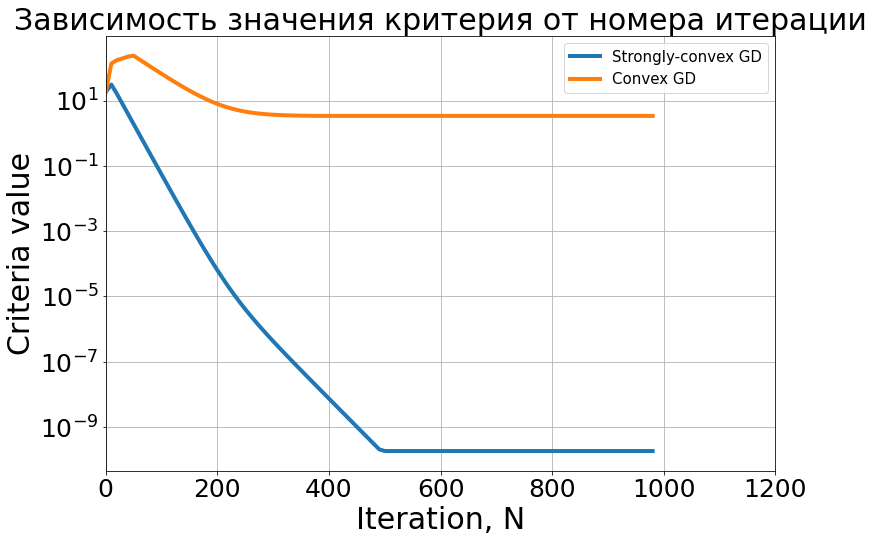

In [87]:
X = np.array([])
for i in range (0, 99):
    X = np.append(X, 10*i)
Y = np.array([])
for i in range (0, 99):
    Y = np.append(Y, grad3g[10*i].dot(grad3g[10*i]))
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, 10*i)
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, grad03g[10*i].dot(grad03g[10*i]))
    
plt.figure(figsize=(12, 8))
    
plt.semilogy(X, Y, linewidth=4, label = 'Strongly-convex GD')
plt.semilogy(X1, Y1, linewidth=4, label = 'Convex GD', markersize = 20)

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"Iteration, N", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от номера итерации", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 1200)

plt.grid()

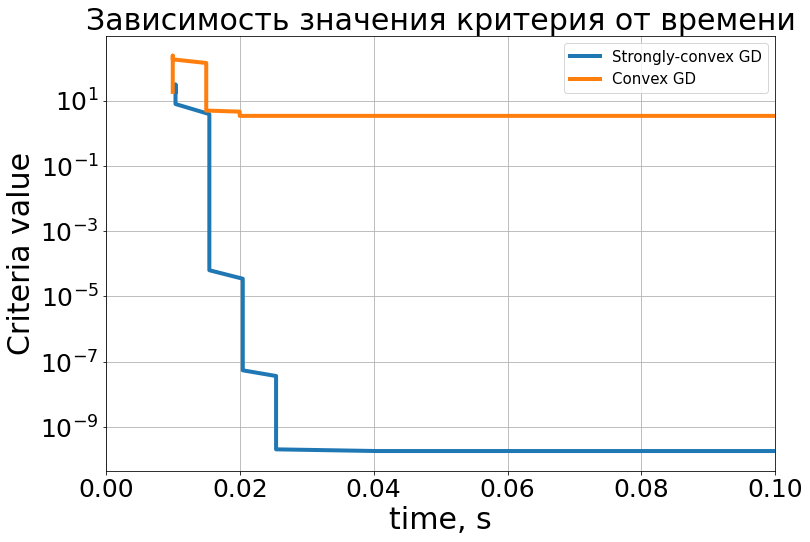

In [88]:
X = np.array([])
for i in range (0, 199):
    X = np.append(X, time3g[10*i])
Y = np.array([])
for i in range (0, 199):
    Y = np.append(Y, grad3g[10*i].dot(grad3g[10*i]))
X1 = np.array([])
for i in range (0, 199):
    X1 = np.append(X1, time03g[10*i])
Y1 = np.array([])
for i in range (0, 199):
    Y1 = np.append(Y1, grad03g[10*i].dot(grad03g[10*i]))
    
plt.figure(figsize=(12, 8))
    
plt.semilogy(X, Y, linewidth=4, label = 'Strongly-convex GD')
plt.semilogy(X1, Y1, linewidth=4, label = 'Convex GD', markersize = 20)

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 0.1)

plt.grid()

#### 4. Шаг Поляка-Шора, $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$. Возьмем $\alpha = 2$

In [89]:
def Polyak(x, A, b):
    x_true = np.linalg.solve(A, b)
    return (func(A, b, x) - func(A, b, x_true))/(15*gradient(x, A, b).dot(gradient(x, A, b)))

In [90]:
res4, grad4, time4 = gradient_descent(A, b, np.zeros(d), 4, 10000)
res04, grad04, time04 = gradient_descent(A1, b, np.zeros(d), 4, 10000)

In [91]:
print("Значение критерия разности функций для сильно выпуклой:", abs(func(A, b, res4[9999]) - func(A, b, x_true)))
print("Значение критерия близость нормы градиента к нулю для сильно выпуклой:", grad4[9998].dot(grad4[9998]))
print("Значение критерия разности функций для выпуклой:", abs(func(A1, b, res04[9999]) - func(A1, b, x_true1)))
print("Значение критерия близость нормы градиента к нулю для выпуклой:", grad04[9998].dot(grad04[9998]))

Значение критерия разности функций для сильно выпуклой: 0.0
Значение критерия близость нормы градиента к нулю для сильно выпуклой: 6.493737053742446e-16
Значение критерия разности функций для выпуклой: 174649322.72231698
Значение критерия близость нормы градиента к нулю для выпуклой: 37592522972.94878


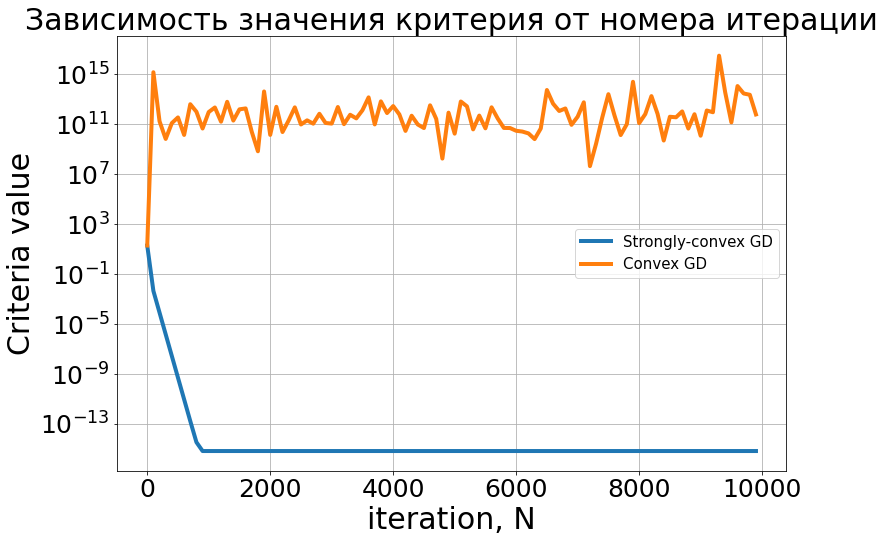

In [92]:
X = np.array([])
for i in range (0, 100):
    X = np.append(X, 100*i)
Y = np.array([])
for i in range (0, 100):
    Y = np.append(Y, grad4[100*i].dot(grad4[100*i]))
X1 = np.array([])
for i in range (0, 100):
    X1 = np.append(X1, 100*i)
Y1 = np.array([])
for i in range (0, 100):
    Y1 = np.append(Y1, grad04[100*i].dot(grad04[100*i]))
    
plt.figure(figsize=(12, 8))
    
plt.semilogy(X, Y, linewidth=4, label = 'Strongly-convex GD')
plt.semilogy(X1, Y1, linewidth=4, label = 'Convex GD')

plt.legend(loc="best", fontsize=15)
plt.xlabel(r"iteration, N", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от номера итерации", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.grid()

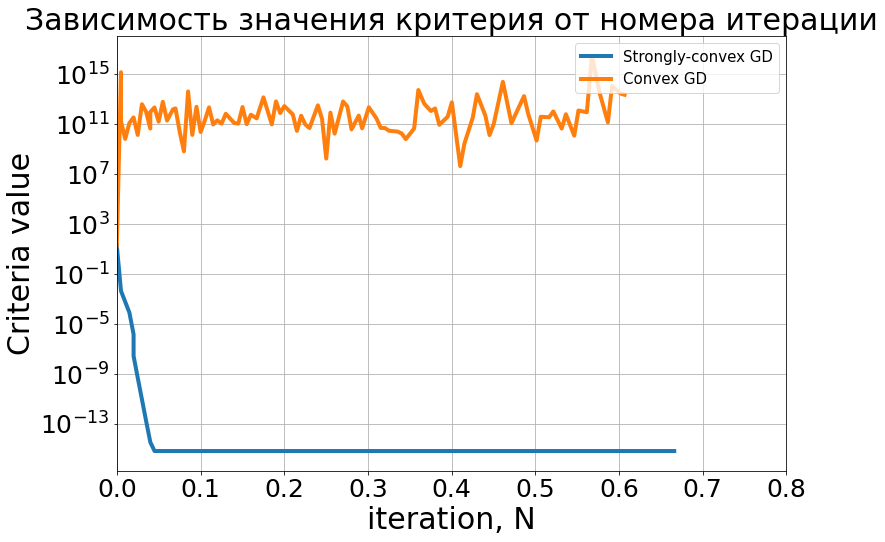

In [93]:
X = np.array([])
for i in range (0, 99):
    X = np.append(X, time4[100*i])
Y = np.array([])
for i in range (0, 99):
    Y = np.append(Y, grad4[100*i].dot(grad4[100*i]))
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, time04[100*i])
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, grad04[100*i].dot(grad04[100*i]))
    
plt.figure(figsize=(12, 8))
    
plt.semilogy(X, Y, linewidth=4, label = 'Strongly-convex GD')
plt.semilogy(X1, Y1, linewidth=4, label = 'Convex GD')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"iteration, N", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от номера итерации", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 0.8)

plt.grid()

#### Построим все методы на одном графике зависимости значения критерия от времени

#### 1. Для сильно выпуклой задачи

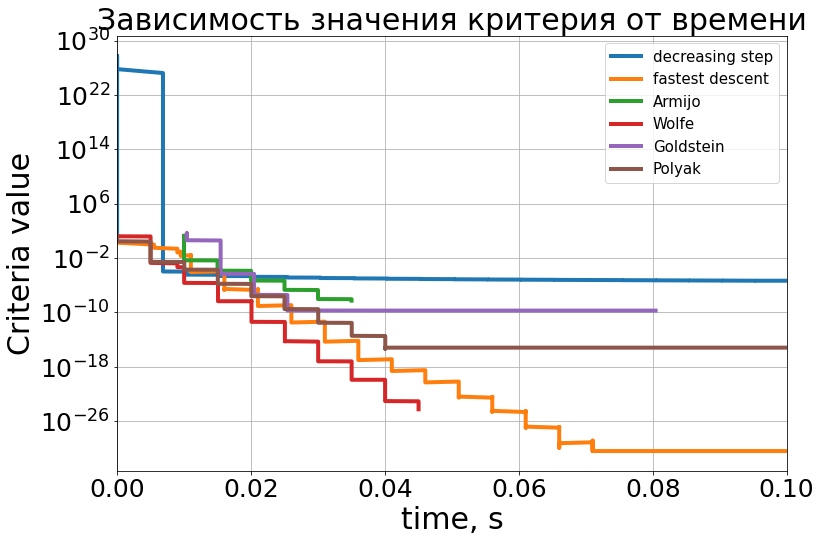

In [94]:
X1 = np.array([])
for i in range (0, 9998):
    X1 = np.append(X1, time1[i])
Y1 = np.array([])
for i in range (0, 9998):
    Y1 = np.append(Y1, grad1[i].dot(grad1[i]))
X2 = np.array([])
for i in range (0, 9998):
    X2 = np.append(X2, time2[i])
Y2 = np.array([])
for i in range (0, 9998):
    Y2 = np.append(Y2, grad2[i].dot(grad2[i]))
X3 = np.array([])
for i in range (0, 998):
    X3 = np.append(X3, time3a[i])
Y3 = np.array([])
for i in range (0, 998):
    Y3 = np.append(Y3, grad3a[i].dot(grad3a[i]))
X4 = np.array([])
for i in range (0, 998):
    X4 = np.append(X4, time3w[i])
Y4 = np.array([])
for i in range (0, 998):
    Y4 = np.append(Y4, grad3w[i].dot(grad3w[i]))
X5 = np.array([])
for i in range (0, 998):
    X5 = np.append(X5, time3g[i])
Y5 = np.array([])
for i in range (0, 998):
    Y5 = np.append(Y5, grad3g[i].dot(grad3g[i]))
X6 = np.array([])
for i in range (0, 9998):
    X6 = np.append(X6, time4[i])
Y6 = np.array([])
for i in range (0, 9998):
    Y6 = np.append(Y6, grad4[i].dot(grad4[i]))

    
plt.figure(figsize=(12, 8))
    
plt.semilogy(X1, Y1, linewidth=4, label = 'decreasing step', markersize = 20)
plt.semilogy(X2, Y2, linewidth=4, label = 'fastest descent', markersize = 20)
plt.semilogy(X3, Y3, linewidth=4, label = 'Armijo', markersize = 20)
plt.semilogy(X4, Y4, linewidth=4, label = 'Wolfe', markersize = 20)
plt.semilogy(X5, Y5, linewidth=4, label = 'Goldstein', markersize = 20)
plt.semilogy(X6, Y6, linewidth=4, label = 'Polyak', markersize = 20)


plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 0.1)

plt.grid()

#### 1. Для выпуклой задачи

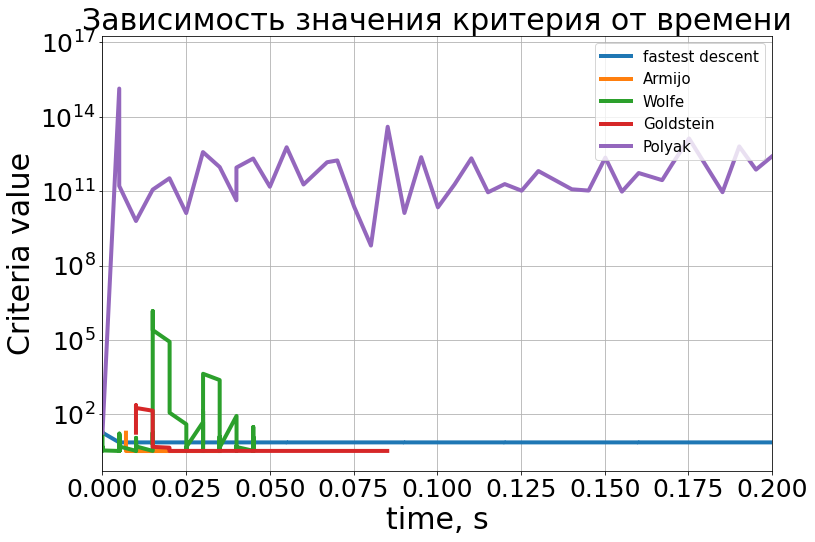

In [95]:
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, time01[100*i])
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, grad01[100*i].dot(grad01[100*i]))
X2 = np.array([])
for i in range (0, 99):
    X2 = np.append(X2, time02[100*i])
Y2 = np.array([])
for i in range (0, 99):
    Y2 = np.append(Y2, grad02[100*i].dot(grad02[100*i]))
X3 = np.array([])
for i in range (0, 99):
    X3 = np.append(X3, time03a[10*i])
Y3 = np.array([])
for i in range (0, 99):
    Y3 = np.append(Y3, grad03a[10*i].dot(grad03a[10*i]))
X4 = np.array([])
for i in range (0, 99):
    X4 = np.append(X4, time03w[10*i])
Y4 = np.array([])
for i in range (0, 99):
    Y4 = np.append(Y4, grad03w[10*i].dot(grad03w[10*i]))
X5 = np.array([])
for i in range (0, 99):
    X5 = np.append(X5, time03g[10*i])
Y5 = np.array([])
for i in range (0, 99):
    Y5 = np.append(Y5, grad03g[10*i].dot(grad03g[10*i]))
X6 = np.array([])
for i in range (0, 99):
    X6 = np.append(X6, time04[100*i])
Y6 = np.array([])
for i in range (0, 99):
    Y6 = np.append(Y6, grad04[100*i].dot(grad04[100*i]))

    
plt.figure(figsize=(12, 8))
    
#plt.semilogy(X1, Y1, linewidth=4, label = 'decreasing step', markersize = 20)
plt.semilogy(X2, Y2, linewidth=4, label = 'fastest descent', markersize = 20)
plt.semilogy(X3, Y3, linewidth=4, label = 'Armijo', markersize = 20)
plt.semilogy(X4, Y4, linewidth=4, label = 'Wolfe', markersize = 20)
plt.semilogy(X5, Y5, linewidth=4, label = 'Goldstein', markersize = 20)
plt.semilogy(X6, Y6, linewidth=4, label = 'Polyak', markersize = 20)


plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 0.2)

plt.grid()

#### ВЫВОД: 
С выпуклой задачей были получены лучшие результаты. С сильно выпуклой задачей Наискорейший спуск досиг лучшей точности, Поляк и Вульф были также быстры.